# Risk Analysis for Loan Applications

### Introduction
The focus of this project is to analyze load application data to understand risk factors and trends.


### About the dataset
The dataset used for this analysis contains information about loan applicants, including their income, loan amount, employment length, credit history, and loan intent. Key columns include:
1. Person Information:
   person_income- Annual income of the loan applicant,
   person_emp_length: Length of employment (in years),
   person_home_ownership: Housing situation of the applicant (e.g., rent, own, mortgage)

2. Loan Information:
   loan_amnt: Amount of the loan applied for
   loan_int_rate: Interest rate of the loan
   loan_intent: Purpose of the loan (e.g., debt consolidation, home improvement)
   
4. Risk Indicators:
    cb_person_cred_hist_length: Credit history length of the applicant
    cb_person_default_on_file: Whether the applicant has previously defaulted



#### Project Objective with the Dataset
1. Cleaning the dataset to adress trends and patterns in load applications and risk levels
2. Categorize applicants into Low, Medium, or High risk based on a derived Risk Score (calculated as the ratio of loan amount to income)
3. Provide insights for the Risk Management team to improve loan policies and reduce defaults.

### Data Cleaning
* Handle missing values by replacing them with meaningful defaults (e.g., medians)
* Convert text-based columns to categorical data types for efficiency
* Add new columns like Risk Score and Risk Category for better analysis

In [25]:
import pandas as pd

# Load the dataset
file_path = "C:\\Users\\Kamrun Nahar Mim\\Documents\\Portfolio\\credit_risk_dataset.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Preview the data
print(data.head())

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


In [27]:
print(data.isnull().sum())  # Check for missing values in each column


print(data.info())  # Check for data types and null values
print(data.describe())  # View summary statistics for numerical columns

###Checking for columns with only zeros
zero_columns = data.columns[(data == 0).all()]
print("Columns with only zero values:", zero_columns)


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6

In [29]:
###Replace Zero Values with a Default or Median Value
for col in zero_columns:
    if data[col].dtype != "object":  # Only handle numerical columns
        data[col] = data[col].replace(0, data[col].median())


##### Fill person_emp_length (Employee Length)

data['person_emp_length'] = data['person_emp_length'].fillna(data['person_emp_length'].median())

#### Fill loan_int_rate (Loan Interest Rate)
data['loan_int_rate'] = data['loan_int_rate'].fillna(data['loan_int_rate'].median())

##Verify missing values
print(data.isnull().sum())  # Should show all columns with 0 missing values


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [19]:
# Import necessary libraries
import pandas as pd

# Load the cleaned dataset
file_path = "cleaned_dataset.csv"  
data = pd.read_csv(file_path)

# Preview the data
print("First 5 rows of the dataset:")
print(data.head())

# Check basic information about the dataset
print("\nDataset Info:")
print(data.info())

# Check summary statistics
print("\nSummary Statistics:")
print(data.describe())


First 5 rows of the dataset:
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  \
0                 0.59                         Y 

In [33]:
###Convert columns to appropriate data types
data['person_home_ownership'] = data['person_home_ownership'].astype('category')
data['loan_intent'] = data['loan_intent'].astype('category')
data['loan_grade'] = data['loan_grade'].astype('category')
data['cb_person_default_on_file'] = data['cb_person_default_on_file'].astype('category')


####Adding a Derived Column for Risk Score
data['Risk_Score'] = data['loan_amnt'] / data['person_income']


####Grouping the Risk Score into categories like Low, Medium, and High risk
conditions = [
    (data['Risk_Score'] < 0.2),
    (data['Risk_Score'] >= 0.2) & (data['Risk_Score'] < 0.5),
    (data['Risk_Score'] >= 0.5)
]
choices = ['Low', 'Medium', 'High']
data['Risk_Category'] = pd.Categorical(pd.cut(data['Risk_Score'], bins=[-float('inf'), 0.2, 0.5, float('inf')], labels=choices))


data.to_csv('cleaned_dataset.csv', index=False)
print("Cleaned dataset saved to cleaned_dataset.csv")

Cleaned dataset saved to cleaned_dataset.csv


In [35]:
##### looking for missing Values in Cleaned_data
import pandas as pd

# Load the cleaned dataset
cleaned_data = pd.read_csv('cleaned_dataset.csv')

# Preview the data
print(cleaned_data.head())

print(cleaned_data.isnull().sum())

print("Are there any missing values in the dataset?", cleaned_data.isnull().values.any())

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  \
0                 0.59                         Y                           3  

Data cleaning is successfull. No missing data was found

### Key Plots and Insights
- Lets see how many loans falls into Low, Medium and High risk

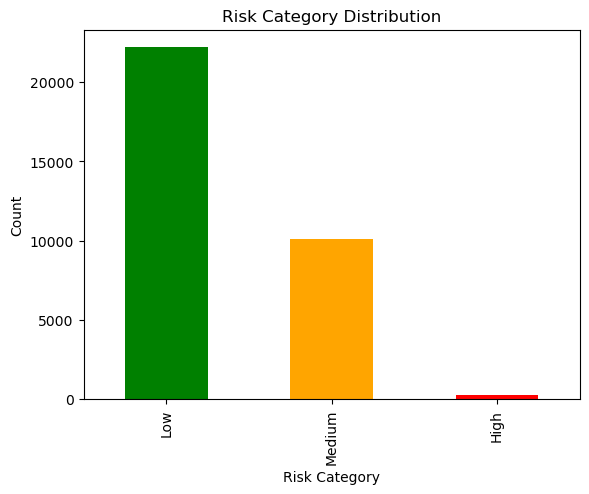

In [39]:
import matplotlib.pyplot as plt

# Plot Risk Category Distribution
data['Risk_Category'].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Risk Category Distribution')
plt.xlabel('Risk Category')
plt.ylabel('Count')
plt.show()


* The bar chart shows the count of loans in each risk category (Low, Medium, and High).
* Most loans fall into the Low Risk category, followed by Medium Risk, with very few in the High Risk category.

### That means that most of their loans are relatively safe (Low Risk), which is good for minimizing defaults. 
The bank should Keep monitoring the Medium Risk group closely. Consider strategies to reduce the proportion of Medium and High Risk loans, such as better applicant screening or stricter credit checks.

### Loan Amount vs. Income 
- relationship between income and loan amount

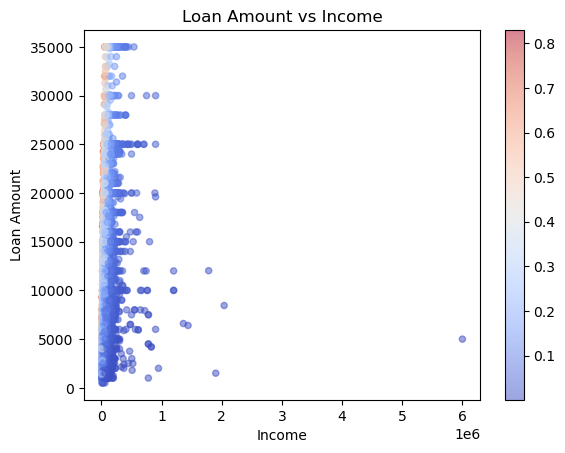

In [42]:
# Scatter plot: Loan Amount vs Income
data.plot.scatter(x='person_income', y='loan_amnt', alpha=0.5, c=data['Risk_Score'], cmap='coolwarm')
plt.title('Loan Amount vs Income')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.show()


* The scatter plot compares the loan amounts (Y-axis) to the applicant's income (X-axis).
* Most data points cluster on the left side, meaning many applicants have lower incomes.
* The color gradient (Risk Score) shows that higher Risk Scores are often associated with applicants borrowing a lot compared to their income.


### It shows that 
1. Low-income applicants make up a large portion of the loan applications.
2. High Risk loans are mostly from applicants with higher loan amounts relative to their income

### Recommendation 
The bank can implement stricter loan-to-income ratios for higher loan amounts.
Develop special programs for low-income groups to offer smaller, more affordable loans with less risk.

### Check which loan intents are most common and if they correlate with risk.

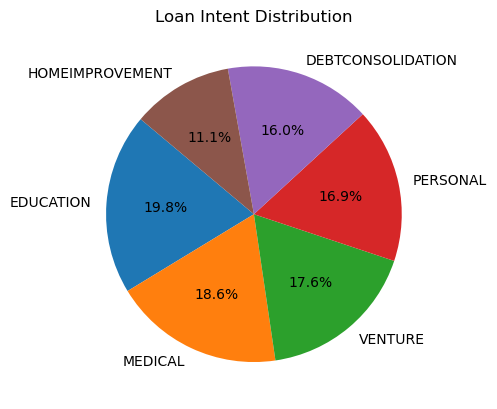

In [44]:

data['loan_intent'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Loan Intent Distribution')
plt.ylabel('')
plt.show()


The pie chart shows the percentage of loans for different purposes (Loan Intent).
### The most common loan purposes are:
* Education (19.8%)
* Medical expenses (18.6%)
* Venture (17.6%)
* Other intents like debt consolidation, personal expenses, and home improvement make up smaller percentages.

1. Loans for education and medical purposes are often lower risk, as borrowers see these as essential needs.
2. Venture loans may have higher risks since they depend on the success of the business.

### Recommendation 
Focus marketing and loan products on high-demand categories like education and medical expenses.
Develop stricter policies or higher interest rates for risky intents like ventures.

### Building Insights for Risk Management

Correlation analysis to see which factors are most related to high-risk loans

In [56]:
# Correlation matrix

# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)




Correlation Matrix:
                            person_age  person_income  person_emp_length  \
person_age                    1.000000       0.173202           0.161454   
person_income                 0.173202       1.000000           0.135164   
person_emp_length             0.161454       0.135164           1.000000   
loan_amnt                     0.050787       0.266820           0.113851   
loan_int_rate                 0.011853       0.000746          -0.051262   
loan_status                  -0.021629      -0.144449          -0.082182   
loan_percent_income          -0.042411      -0.254471          -0.054134   
cb_person_cred_hist_length    0.859133       0.117987           0.143069   
Risk_Score                   -0.042273      -0.253190          -0.052894   

                            loan_amnt  loan_int_rate  loan_status  \
person_age                   0.050787       0.011853    -0.021629   
person_income                0.266820       0.000746    -0.144449   
person_emp_

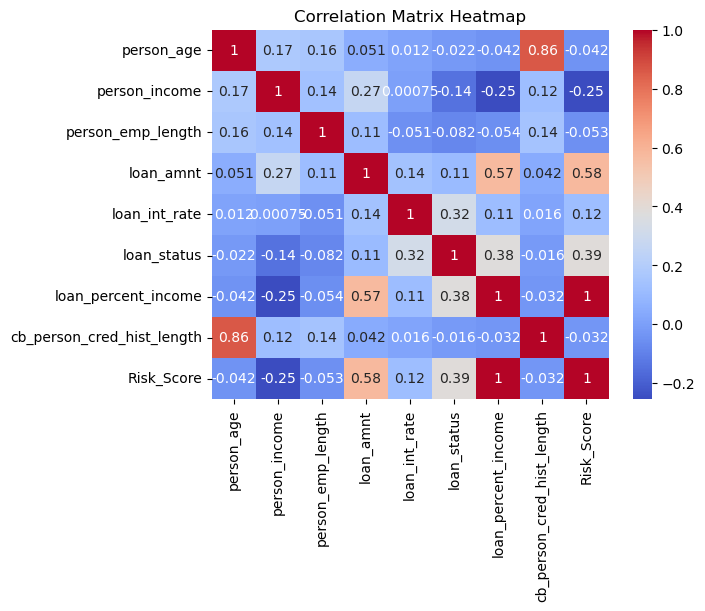

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


This Correlation Matrix shows the relationship between different numerical variables in the dataset. 
### Key insights 
    1. Loan Amount (loan_amnt) and Risk Score (Risk_Score): Correlation is 0.58 (moderate positive correlation), meaning higher loan amounts are associated with higher risk scores.
    
    2. Loan Percent Income (loan_percent_income) and Loan Amount (loan_amnt): Correlation is 0.57 (moderate positive correlation). This indicates that applicants borrowing a high percentage of their income also tend to take larger loans.
    
    3. Loan Status (loan_status) and Risk Score (Risk_Score): Correlation is 0.39 (weak-to-moderate positive correlation). This suggests that higher risk scores are moderately associated with higher loan default statuses.

C:\Users\Kamrun Nahar Mim\AppData\Local\Temp\ipykernel_31212\1451644583.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_interest_rate = data.groupby('Risk_Category')['loan_int_rate'].mean()



Average Interest Rate by Risk Category:
Risk_Category
Low       10.761607
Medium    11.540921
High      11.525509
Name: loan_int_rate, dtype: float64


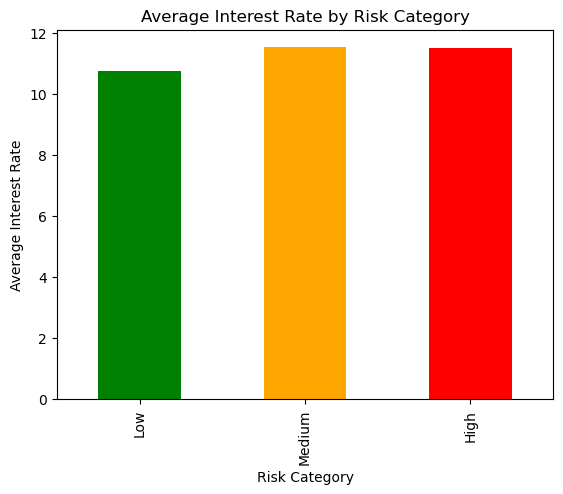

In [62]:
# Group data by Risk_Category and calculate average interest rate
avg_interest_rate = data.groupby('Risk_Category')['loan_int_rate'].mean()
print("\nAverage Interest Rate by Risk Category:")
print(avg_interest_rate)

# Bar plot
avg_interest_rate.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Average Interest Rate by Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Average Interest Rate')
plt.show()


### Key insights
(Low Risk, Green Bar)
1. The average interest rate for Low Risk loans is 10.76%.
2. This is the lowest interest rate among the three categories, as Low Risk borrowers are considered more reliable.
   
Medium Risk (Orange Bar)
1. The average interest rate for Medium Risk loans is 11.54%.
2. It is slightly higher than Low Risk because Medium Risk borrowers are less reliable and carry a higher chance of default.

High Risk (Red Bar):
1. The average interest rate for High Risk loans is 11.52%.
2. Interestingly, this is almost the same as Medium Risk, which might indicate the bank does not significantly differentiate between Medium and High Risk borrowers in terms of interest rates.

   